# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data
cars = pd.read_csv("https://jdgrossman.com/assets/used-cars.tsv", sep="\t")
print(cars.head())

   type  year   make model                trim  mileage  price
0  USED  2010  Acura    TL                Base    73936  19388
1  USED  2012  Acura   MDX  Technology Package    32453  34898
2  USED  2010  Acura    TL                Base    34302  22000
3  USED  2009  Acura    TL              SH-AWD    98772  17988
4  USED  2007  Acura   MDX                Base    65677  22777


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [4]:
# Create accords dataset
accords = cars[(cars['make'] == 'Honda') &
               (cars['model'] == 'Accord') &
               (cars['type'] == 'USED')].copy()

print(f"\nNumber of Honda Accords: {len(accords)}")


# Fit Linear Regression: price ~ mileage
X = accords[['mileage']]
X = sm.add_constant(X)  # Adds intercept
y = accords['price']

model1 = sm.OLS(y, X).fit()
print("\n" + model1.summary().as_text())


# Extract and Report Coefficients
beta0 = model1.params['const']
beta1 = model1.params['mileage']
se_beta0 = model1.bse['const']
se_beta1 = model1.bse['mileage']
sigma = np.sqrt(model1.scale)  # Residual standard error
r_squared = model1.rsquared


# Results
print("\n--- Model Components ---")
print(f"β̂₀ = ${beta0:,.0f}")
print(f"\nβ̂₁ = ${beta1:.3f} per mile")
print(f"\nse(β̂₀) = ${se_beta0:,.0f}")
print(f"\nse(β̂₁) = ${se_beta1:.4f}")
print(f"\nσ̂ = ${sigma:,.0f}")
print(f"\nR² = {r_squared:.3f}")


Number of Honda Accords: 122

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.58e-37
Time:                        14:37:31   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.068e+04


---

The value of $\hat{\beta}_0$ with units: $20,676

Interpretation: The expected price of a Honda Accord with 0 miles is $20,676

---

The value of $\hat{\beta}_1$ with units: $-0.088 per mile

Interpretation:For each additional mile, the price decreases by $0.088

---

The value of $\text{se}({\hat{\beta}_0})$ with units: se(β̂₀) = $399

Interpretation: The standard error of the intercept estimate

---

The value of $\text{se}({\hat{\beta}_1})$ with units: se(β̂₁) = $0.0047

Interpretation: The standard error of the slope estimate

---

The value of $\hat{\sigma}$ with units: σ̂ = $2,420

Interpretation:

---

The value of $\text{R}^2$ with units: R² = 0.744

Interpretation: 74.4% of variance in price is explained by mileage

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [5]:
# Your code here!
new_data_50k = pd.DataFrame({'const': [1], 'mileage': [50000]})
pred_50k = model1.get_prediction(new_data_50k)
pred_summary_50k = pred_50k.summary_frame(alpha=0.05)

print(f"\nPredicted price at 50,000 miles: ${pred_summary_50k['mean'][0]:,.2f}")
print(f"95% Confidence Interval: [${pred_summary_50k['mean_ci_lower'][0]:,.2f}, ${pred_summary_50k['mean_ci_upper'][0]:,.2f}]")


Predicted price at 50,000 miles: $16,285.20
95% Confidence Interval: [$15,809.15, $16,761.24]


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [6]:
# Your code here!
new_data_300k = pd.DataFrame({'const': [1], 'mileage': [300000]})
pred_300k = model1.get_prediction(new_data_300k)
pred_summary_300k = pred_300k.summary_frame(alpha=0.05)

print(f"\nPredicted price at 300,000 miles: ${pred_summary_300k['mean'][0]:,.2f}")
print(f"95% Confidence Interval: [${pred_summary_300k['mean_ci_lower'][0]:,.2f}, ${pred_summary_300k['mean_ci_upper'][0]:,.2f}]")



Predicted price at 300,000 miles: $-5,667.20
95% Confidence Interval: [$-7,842.02, $-3,492.38]


---


Critical Issue:
1. The model predicts NEGATIVE prices for high mileage values!
2. This violates the constraint that prices must be positive.


---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

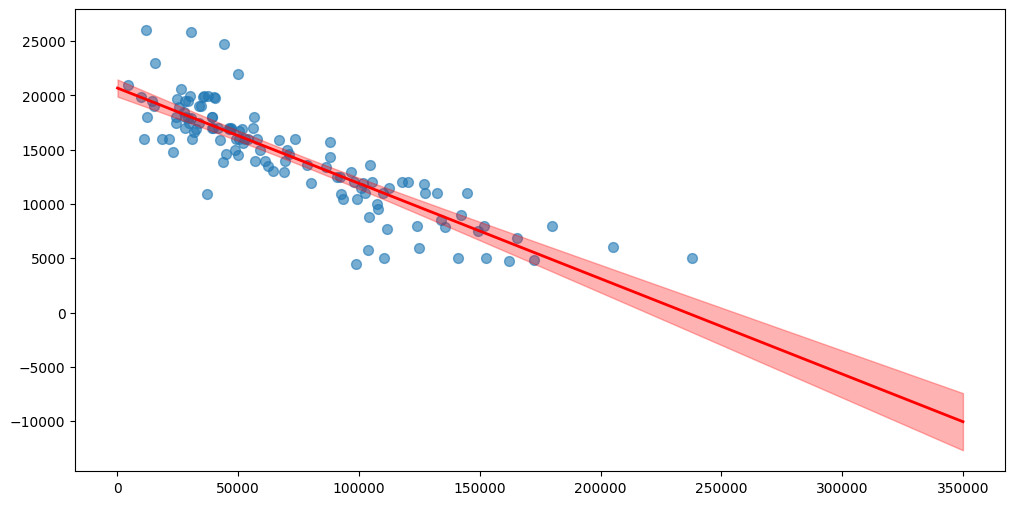

In [7]:
# Scatter plot
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(accords['mileage'], accords['price'], alpha=0.6, s=50, label='Data')

# Regression Line with Confidence Bands
mileage_range = np.linspace(0, 350000, 500)
pred_df = pd.DataFrame({'const': 1, 'mileage': mileage_range})
predictions = model1.get_prediction(pred_df)
pred_summary = predictions.summary_frame(alpha=0.05)

ax.plot(mileage_range, pred_summary['mean'], 'r-', linewidth=2, label='Regression Line')
ax.fill_between(mileage_range,
                pred_summary['mean_ci_lower'],
                pred_summary['mean_ci_upper'],
                alpha=0.3, color='red', label='95% CI')

## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [8]:
# Fit log-transformed model
X_log = accords[['mileage']]
X_log = sm.add_constant(X_log)
y_log = np.log(accords['price'])

model_log = sm.OLS(y_log, X_log).fit()
print("\n" + model_log.summary().as_text())


# Predictions for 50,000 and 300,000 miles
pred_log_50k = model_log.get_prediction(new_data_50k)
pred_log_300k = model_log.get_prediction(new_data_300k)

price_50k = np.exp(pred_log_50k.predicted_mean[0])
price_300k = np.exp(pred_log_300k.predicted_mean[0])

print(f"\nPredicted price at 50,000 miles: ${price_50k:,.2f}")
print(f"Predicted price at 300,000 miles: ${price_300k:,.2f}")




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     356.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.01e-37
Time:                        14:48:39   Log-Likelihood:                 23.725
No. Observations:                 122   AIC:                            -43.45
Df Residuals:                     120   BIC:                            -37.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0325      0.033    302.631      0.

## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

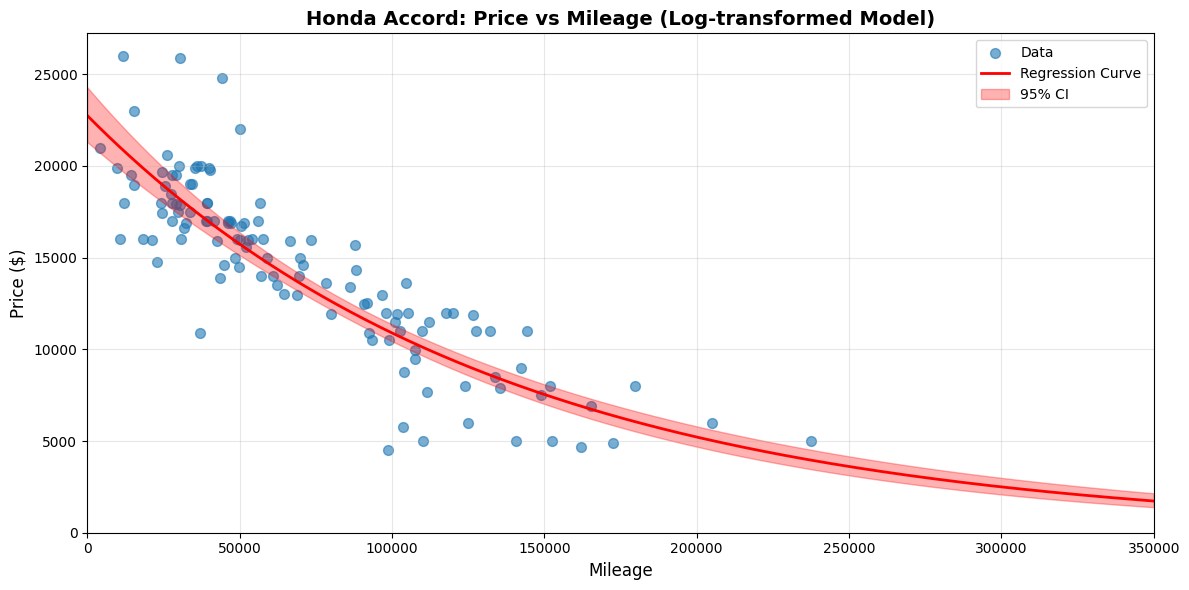

Plot saved as 'exercise6_log_model.png'


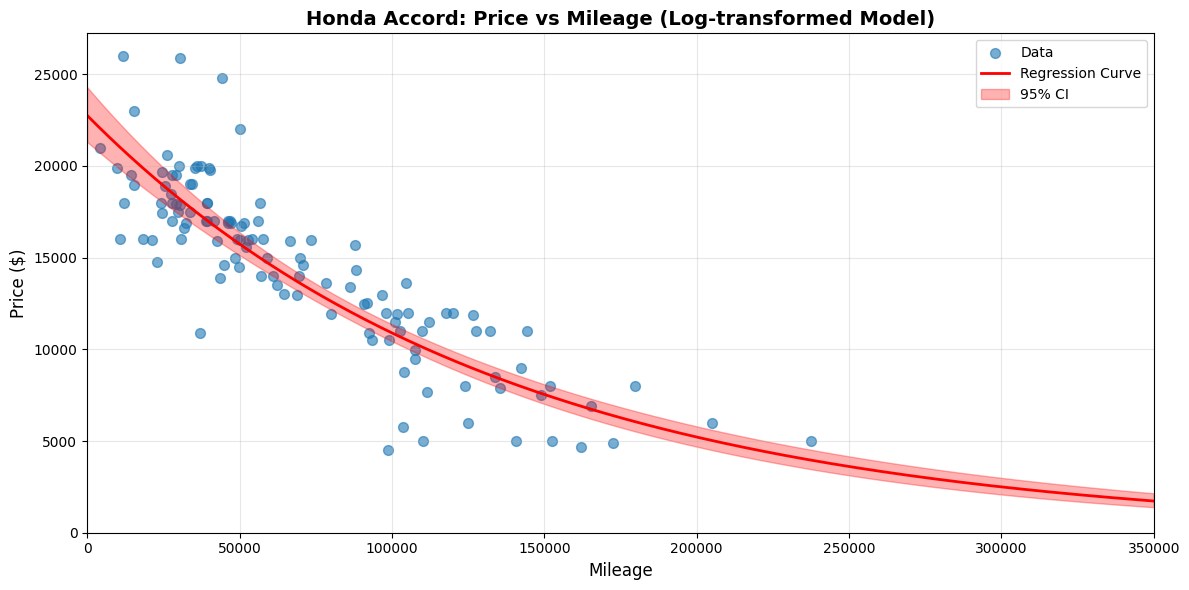

In [9]:
# Scatter Plot
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(accords['mileage'], accords['price'], alpha=0.6, s=50, label='Data')


# Predictions on Original Scale
pred_log_all = model_log.get_prediction(pred_df)
pred_log_summary = pred_log_all.summary_frame(alpha=0.05)

# Transform back to original scale
price_pred = np.exp(pred_log_summary['mean'])
price_ci_lower = np.exp(pred_log_summary['mean_ci_lower'])
price_ci_upper = np.exp(pred_log_summary['mean_ci_upper'])

ax.plot(mileage_range, price_pred, 'r-', linewidth=2, label='Regression Curve')
ax.fill_between(mileage_range, price_ci_lower, price_ci_upper,
                alpha=0.3, color='red', label='95% CI')

ax.set_xlabel('Mileage', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_title('Honda Accord: Price vs Mileage (Log-transformed Model)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 350000)
ax.set_ylim(0, None)
plt.tight_layout()
display(fig)
plt.savefig('exercise6_log_model.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'exercise6_log_model.png'")

## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [10]:
exp_beta0 = np.exp(model_log.params['const'])
exp_beta1 = np.exp(model_log.params['mileage'])
exp_beta1_10k = np.exp(model_log.params['mileage'] * 10000)

print(f"\nexp(β̂₀) = ${exp_beta0:,.2f}")
print(f"\nexp(β̂₁) = {exp_beta1:.6f}")
print(f"\nexp(10,000 × β̂₁) = {exp_beta1_10k:.4f}")
pct_change = (exp_beta1_10k - 1) * 100
print(f"\nR² = {model_log.rsquared:.3f}")


exp(β̂₀) = $22,754.22

exp(β̂₁) = 0.999993

exp(10,000 × β̂₁) = 0.9290

R² = 0.748



---

The value of $\exp(\hat{\beta}_0)$ with units:

Interpretation:

---

The value of $\exp(\hat{\beta}_1)$ with units:

Interpretation:

---

The value of $\text{R}^2$ with units:

Interpretation:

---

The value of $\exp(\hat{\beta}_0)$ with units: exp(β̂₀) = $22,754.22

Interpretation: The expected price of a Honda Accord with 0 miles is $22,754.22

---

The value of $\exp(\hat{\beta}_1)$ with units: exp(β̂₁) = 0.999993

Interpretation (per mile): Each additional mile multiplies the price by 0.999993

---

The value of $\exp(1000 * \hat{\beta}^_1)$ with units: exp(1000 * β̂₁) = 0.9290

Interpretation (per 10,000 miles): Each additional 10,000 miles multiplies the price by 0.9290, or a 7.10% decrease

---

The value of $\text{R}^2$ with units: R² = 0.748

Interpretation: 74.8% of variance in log(price) is explained by mileage

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [11]:
X_multi = accords[['mileage', 'year']]
X_multi = sm.add_constant(X_multi)
y_log = np.log(accords['price'])

model_multi = sm.OLS(y_log, X_multi).fit()
print("\n" + model_multi.summary().as_text())

print(f"\nR² comparison:")
print(f"  Model with mileage only: {model_log.rsquared:.4f}")
print(f"  Model with mileage + year: {model_multi.rsquared:.4f}")



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     373.8
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           4.93e-52
Time:                        15:01:50   Log-Likelihood:                 60.761
No. Observations:                 122   AIC:                            -115.5
Df Residuals:                     119   BIC:                            -107.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -122.9795     13.342     -9.217      0.

---

The R² increased from 0.7480 to 0.8627, indicating that year explains additional variance in price beyond mileage..


---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [12]:
X_all = cars[['mileage', 'year']]
X_all = sm.add_constant(X_all)
y_all_log = np.log(cars['price'])

model_all = sm.OLS(y_all_log, X_all).fit()
print("\n" + model_all.summary().as_text())

print(f"\nR² comparison:")
print(f"  Model with Accords only: {model_multi.rsquared:.4f}")
print(f"  Model with all cars: {model_all.rsquared:.4f}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1208.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):          1.13e-295
Time:                        15:07:07   Log-Likelihood:                -208.30
No. Observations:                1286   AIC:                             422.6
Df Residuals:                    1283   BIC:                             438.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -147.3908      9.008    -16.363      0.

---

The R² decreased because different makes and models have different baseline prices that aren't captured by mileage and year alone.

---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [13]:
# Create full design matrix with dummies for make and model
X_full = pd.get_dummies(cars[['mileage', 'year', 'make', 'model']],
                        columns=['make', 'model'], drop_first=True)

# Convert every column to float to avoid "object dtype" error
X_full = X_full.astype(float)

# Add intercept
X_full = sm.add_constant(X_full)

# Log-transform price
y_full_log = np.log(cars['price'])

# Fit model
model_full = sm.OLS(y_full_log, X_full).fit()

print(model_full.summary())

print(f"\nR² with make and model: {model_full.rsquared:.4f}")
print(f"exp(β₀) = ${np.exp(model_full.params['const']):,.2f}")

print("\nInterpretation:")
print("exp(β₀) is the expected price for the baseline make and model")
print("(the first alphabetically) with mileage = 0 and year = 0.")
print("This is not meaningful — the year = 0 part makes the intercept useless.")

print("\nOne fix: center the year variable so that the intercept corresponds")
print("to a realistic reference year (e.g., the median year).")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:08:08   Log-Likelihood:                 691.86
No. Observations:                1286   AIC:                            -1360.
Df Residuals:                    1274   BIC:                            -1298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -141.1849      3.951    -

---

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The smallest eigenvalue is 1.34e-31. This might indicate that there are strong multicollinearity problems or that the design matrix is singular.

---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [14]:
# Center year around its median
median_year = cars['year'].median()
cars_centered = cars.copy()
cars_centered['year_centered'] = cars_centered['year'] - median_year

# Build X: mileage, centered year, and dummies
X_centered = pd.get_dummies(
    cars_centered[['mileage', 'year_centered', 'make', 'model']],
    columns=['make', 'model'],
    drop_first=True
)

# Convert all predictors to float to avoid dtype errors
X_centered = X_centered.astype(float)

# Add intercept
X_centered = sm.add_constant(X_centered)

# Log(price)
y_centered_log = np.log(cars_centered['price'])

# Fit model
model_centered = sm.OLS(y_centered_log, X_centered).fit()

print(model_centered.summary())

# Interpretation
exp_intercept = np.exp(model_centered.params['const'])
exp_year_effect = np.exp(model_centered.params['year_centered'])

print(f"\nexp(β₀) = ${exp_intercept:,.2f}")
print("Interpretation of intercept:")
print(f"The expected price of the baseline make/model with 0 mileage at the median year ({int(median_year)}) is ${exp_intercept:,.2f}.")

print(f"\nInterpretation of model year coefficient:")
print(f"Each additional year multiplies expected price by {exp_year_effect:.4f},")
print(f"meaning price changes by {(exp_year_effect - 1) * 100:.2f}% per year.")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1238.
Date:                Tue, 18 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:09:14   Log-Likelihood:                 691.86
No. Observations:                1286   AIC:                            -1360.
Df Residuals:                    1274   BIC:                            -1298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.7583      0.009   10

---

Each additional year multiplies expected price by 1.0905,

---